###### CSCE 320 :: Principles of Data Science ::Texas A&M University :: Fall 2020


# Homework 4: Clustering

### 100 points [7% of your final grade]
### Due: October 21 by 11:59pm

*Goals of this homework:* There are two main objectives of this homework: (i) implement k-means from scratch, (ii)  apply k-means on a toy dataset (the iris data), and (iii) explore the clustering of text data.

*Submission instructions (Canvas):* To submit your homework, rename this notebook as `UIN_hw4.ipynb`. For example, if your UIN is `123456789`, then your homework submission would be something like `123456789_hw4.ipynb`. Submit this notebook via Canvas (looking for homework 4 under the assignment section; detailed instructions can be found [here](https://community.canvaslms.com/t5/Student-Guide/How-do-I-upload-a-file-as-an-assignment-submission-in-Canvas/ta-p/274)). Your notebook should be completely self-contained, with the results visible in the notebook. We should not have to run any code from the command line, nor should we have to run your code within the notebook (though we reserve the right to do so). So please run all the cells for us, and then submit. 

*Late submission policy:* For this homework, you may use up to three of your late days, meaning that no submissions will be accepted after October 24 at 11:59pm.

### Collaboration declarations:

You should add in all of your collaboration declarations here. 

* Collaboration Declaration 1
* Collaboration Declaration 2
* ...

*Recall our homework collaboration policy: Your homework is yours alone and you are expected to complete each homework independently. Your solution should be written by you without the direct aid or help of anyone else. However, we believe that collaboration and team work are important for facilitating learning, so we encourage you to discuss problems and general problem approaches (but not actual solutions) with your classmates. If you do have a chat with another student about a homework problem, you must inform us by writing a note on your homework submission (e.g., Bob pointed me to the relevant section for problem 3). The basic rule is that no student should explicitly share a solution with another student (and thereby circumvent the basic learning process), but it is okay to share general approaches, directions, and so on. If you feel like you have an issue that needs clarification, feel free to contact either me or the TA.*

## (30 points) Part 1: Implement k-means
  
For the first part of this assignment, you are going to implement k-means from (almost) scratch, which means you can only use [The Python Standard Library](https://docs.python.org/3/library/). 
We have predefined some helper functions for the ease of implementation and grading. However, you should always keep the main function's structure in mind while implementing those helper functions.

In [1]:
# Within the scope of The Python Standard Library, import all packages you need for the implementation of k-means
### your imports here ###
import random
import math
import operator

**Helper Function 1:** Initialize Centroids  
To start with, you need to pick k initial centroids from the data.

In [2]:
def initializeCentroids(datapoints, k):
    ### your code here ###
    
    centroids = {} # initialize empty dictionary of centroids
    
    random.shuffle(datapoints) # shuffle data
    
    for i in range(k): # pick k centroids
        centroids[i] = datapoints[i];
    
    return centroids

In [3]:
# optional: you may fake some simple data to test your implementation of initializeCentroids here
### your code here ###

# Create datapoints list
datapoints = [(random.randrange(0, 100), random.randrange(0, 100), random.randrange(0, 100)) for i in range(10)]

# Get initial centroids
centroids = initializeCentroids(datapoints,2)

# Print chosen centroids
for num,centroid in centroids.items():
    print(num,centroid)

0 (82, 97, 0)
1 (56, 58, 1)


**Helper Function 2:** Termination Condition  
Next, you should determine the termination condition for the loop. This function should return True or False if k-means is done. K-means terminates either because it has run a maximum number of iterations OR the centroids stop changing (your implementation should handle both cases).

In [4]:
def termination(oldCentroids, centroids, iterations, max_iterations):
    
    endBool = False
    
    if (oldCentroids == None):
        return endBool;
    
    if iterations >= max_iterations: # check if the maximum # of iterations has been passed
#         print("Termination: Max Iterations Surpassed")
        endBool = True
        return endBool
        
    for tuple_index in range(len(centroids)): # check if centroids have stopped changing
        
        # ------------------ Simple Centroid Comparison ------------------ #
#         print(" ----- centroid tuples ----- ")
#         print(oldCentroids[tuple_index])
#         print(centroids[tuple_index])
#         print()
        
        if (oldCentroids[tuple_index] == centroids[tuple_index]):
#             print("Termination: No Change in Centroid")
            
#             print(" ----- centroid tuples ----- ")
#             print(oldCentroids[tuple_index])
#             print(centroids[tuple_index])
#             print()
            
            endBool = True
            return endBool
        
        # ------------------ Complex Centroid Comparison ------------------ #
#         percentError = 0
#         for num_index in range(len(centroids[tuple_index])):
            
#             oldCentroidNum = oldCentroids[tuple_index][num_index]
#             newCentroidNum = centroids[tuple_index][num_index]
            
#             # calculate percent error between new and old centroids
#             percentError += ((abs(newCentroidNum - oldCentroidNum))/oldCentroidNum)*100

#         if (percentError == 0): # adjust percent error condition as desired
#             endBool = True

    return endBool

In [5]:
# # optional: you may fake some simple data to test your implementation of termination here
# ### your code here ###

# # no termination
# res = termination(centroids,new_centroids,75,100)
# print(res)

# # termination - passed max iterations
# res = termination(centroids,new_centroids,100,100)
# print(res)

# # termination - no change in centroids
# res = termination(centroids,centroids,75,100)
# print(res)

**Helper Function 3:** Assign Cluster  
Now, you can place each datapoint in the cluster whose current centroid is nearest.

In [6]:
# helper function to calculate euclidean distance
def calcEuclideanDistance(x,y):
    distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]));
    return distance

def assignCluster(datapoints, centroids):

    clusters = {} # initiate clusters dictionary
    
    for i in range(len(centroids)): # populate with k clusters for k centroids
        clusters[i] = []
    
    for featureset in datapoints: # assign each feature set to a cluster
        distances  = [calcEuclideanDistance(featureset,centroids[centroid]) for centroid in centroids] # calculate feature set distance to centroids
        cluster = distances.index(min(distances)) # find nearest centroid
        clusters[cluster].append(featureset) # assign feature set to centroid cluster
        
    return clusters

In [7]:
# optional: you may fake some simple data to test your implementation of assignCluster here

# Assign feature sets to clusters
clusters = assignCluster(datapoints,centroids)

# Print calculated clusters
for num,cluster in clusters.items():
    print(num,cluster)

0 [(82, 97, 0)]
1 [(56, 58, 1), (89, 16, 86), (0, 59, 6), (25, 59, 7), (49, 72, 68), (70, 19, 24), (84, 25, 90), (52, 16, 67), (41, 80, 82)]


**Helper Function 4:** Calculate Centroids  
Finally, the last helper function that calculates the new centroid of each cluster.

In [8]:
def calculateCentroids(clusters):
    
    centroids = {} # initialize empty dictionary of centroids
    
    for i in range(len(clusters)): # create k entries for k centroids
        centroids[i] = [];
    
    for num,cluster in clusters.items(): # for each old centroid and set a new centroid
        centroids[num]  = tuple([sum(i)/len(cluster) for i in zip(*cluster)]) # find the cluster average of the current centroid, and set is as the new centroid
    
    return centroids


In [9]:
# optional: you may fake some simple data to test your implementation of calculateCentroids here
### your code here ###

new_centroids = calculateCentroids(clusters) # calculate new centroids

for num,centroid in new_centroids.items(): # for each new centroid, print centroid
    print(num,centroid)

0 (15.0, 38.5, 26.5)
1 (57.25, 33.25, 62.125)


**Main Function**  
It's time to wrap everything up! This function takes datapoints, k, and max_iteration as input; and it returns **a list of length k in which each element is a cluster of datapoints** and **a list of k centroids**. Also, you may want to **preserve the corresponding order of these two lists for the ease of implementation in part 2**.

In [10]:
def kmeans(datapoints, k, max_iteration):
    # initialization
    iterations=0
    oldCentroids = None
    centroids = initializeCentroids(datapoints, k)
    
    # Run the main k-means algorithm
    while not termination(oldCentroids, centroids, iterations, max_iterations):
        
#         print()
#         print("--------------------------------------------------------")
#         print("------------------- NEW ITERATION: " + str(iterations) + " -------------------")
#         print("--------------------------------------------------------")
#         print()
        
#         print(oldCentroids)
#         print()
#         print(centroids)
#         print()
        
        # Update recordings
        oldCentroids = centroids
        iterations += 1
        
        # Assign clusters based on centroids
        clusters = assignCluster(datapoints, centroids)
#         for num, cluster in clusters.items():
#             print(num, cluster)
#             print()
#         print()

        # Update centroids
        centroids = calculateCentroids(clusters)
        
    return clusters, centroids

## (30 points) Part 2: Clustering Irises
For part 2 of this assignment, let's apply the k-means clustering function for plant taxonomy. Specifically, we will try to cluster some irises based on their sepal's and petal's length and width.  

**For this part, you will need to:**
1. Apply the k-means clustering function you just implemented on the iris data with k=1,2,3,...,9,10;
2. Calculate the average distance to centroid for each k;
3. Plot the k vs. average distance to centroid graph to pick the best value of k.

In [11]:
import pandas as pd

# read csv into data frame
datapoints = pd.read_csv('Iris.tsv',sep='\t')

# convert to list of touples
datapointsList = list(datapoints.to_records(index=False))

# ---------- apply k-means clustering ---------- #

# clustering parameters
max_iterations = 25

# plot data
kList = [1,2,3,4,5,6,7,8,9,10]
avgDistances = []

# call kmeans for k=1,2,3,...,10;
for k in kList:
    
    # get 'clusters' and 'centroids' dictionarys from kmeans function
    clusters, centroids = kmeans(datapointsList,k,max_iterations)
    
    # calculate average distance to centroid for current k
    sumDistance = 0
    for centroid in range(len(centroids)): # calculate mean distance to centroid for each centroid
        currCentroid = centroids[centroid]
        for featureset in clusters[centroid]:
            sumDistance += calcEuclideanDistance(featureset,currCentroid)
    avgDistanceToCentroid = sumDistance / len(datapointsList)
    
    avgDistances.append(avgDistanceToCentroid)

<ipython-input-4-050a414ac68f>:21: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  if (oldCentroids[tuple_index] == centroids[tuple_index]):


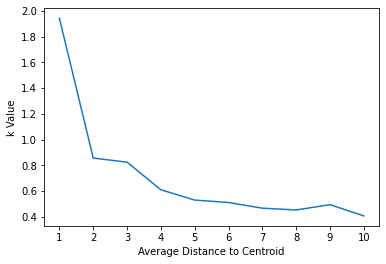

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(kList,avgDistances)
plt.xlabel("Average Distance to Centroid")
plt.ylabel("k Value")
plt.locator_params(axis="x", nbins=10)
plt.show()



**What is the best value of k according to your graph?**  

As we learned in class, the average distance to centroid to falls rapidly until the right k.

According to this logic, the best k seems to be k=2. 

I will note, according to the slide shown in class, k=4 could also be a valid answer. The slope does slow down between k=2,3, however, k=4 is when the slow seems to truly flatten out. The graphic shown in class represented a similar situation to this, choosing a K after multiple changes in the slope.

## (40 points) Part 3: Clustering Text Data
For the 3rd part of this assignment, you will explore the clustering of text data. The good news: for this part, you can use scikit-learn!

Let's take a look at the data:

In [8]:
import pandas as pd

df = pd.read_csv('product_reviews.tsv',sep='\t')
print('Preview:')
print(df.head())
print('\nShape:')
print(df.shape)
print('\nValue Counts:')
print(df['product_type'].value_counts())

Preview:
      product_type                                     review_content
0  Washing_Machine  Electrolux's Editors' Choice award-winning $1,...
1  Washing_Machine  GE's $699 GTW685BSLWS top-load washing machine...
2  Washing_Machine  Samsung's $1,899 WV9900 FlexWash is actually t...
3  Washing_Machine  The $650 GE GTW485ASJWS might be one of the si...
4  Washing_Machine  This $1,200 top-load washing machine seemingly...

Shape:
(7758, 2)

Value Counts:
Phone              1212
Laptop             1069
Camera              834
TV                  794
Headphone           653
Speaker             551
Printer             359
Networking          355
Tablet              282
Monitor             258
Blu-Ray_Player      229
Desktop             216
Video_Camera        206
AV_Receiver         149
Small_Appliance     114
Wearable            107
Media_Streamers      91
Oven                 53
Coffee_Maker         49
Refrigerator         49
Vacuum_Cleaner       45
Washing_Machine      38
Dryer     

The dataset contains 7758 product review articles of 25 different types of products. **The goal for this part is to derive a fixed smaller amount of supergroups (say 5~10 clusters; pick your favorite number!) with different clustering algorithms based on the content of reviews of 25 different types of products.**  
Before feeding the clustering functions, you need to transform the data a little bit so that the clustering functions can digest the review articles.  

First, you should represent each review as a vector, where element i of the vector corresponds to the count of word i in that product review. This is the classic [bag-of-words](https://en.wikipedia.org/wiki/Bag-of-words_model) model. Besides that, you also need to use lower case text, do tokenization, remove punctuations, remove [stop words](https://en.wikipedia.org/wiki/Stop_word), use [n-gram](https://en.wikipedia.org/wiki/N-gram) tokens, etc. for better results.   
Now, let's implement all those things.

**<span style="color:red">Wait a minute!</span> sklearn can do it for your in one line : )**  
Take a look at [sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and apply it to our corpus below. Alternatively, you can opt to implement all those things in the block above with **NO** extra credits :P  
**CountVectorizer has a lot of parameters; set them wisely.**

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

corpus = df.loc[:, 'review_content'].to_list()

vecCount = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=20000)
matrixCount = vecCount.fit_transform(corpus)

Rather than simply consider word counts as the representation of reviews (as we do in CountVectorizer), we can also consider alternative weightings of the words in our vector representation of each review. One of the classic approaches is [TF-IDF](https://en.wikipedia.org/wiki/Tf–idf), which weighs a term in a document highly if it is popular within the document (term frequency) and also rare across all documents (inverse document frequency). Take a look at [sklearn.feature_extraction.text.TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) and apply it to our corpus below.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vecFreq = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=20000)
matrixFreq = vecFreq.fit_transform(corpus)

Now, it's time to do clustering! In the following sections, apply k-means and another clustering algorithm of your choice (within the scope of [sklearn.cluster](https://scikit-learn.org/stable/modules/clustering.html)) to the product review corpus. Try both count vectors and tf-idf vectors, and record:
- Cluster Composition by Count: for each cluster, count the amount of reviews by product_type;
- Cluster Composition by Percentage: for each product_type, calculate its reviews' distribution (in percentage) across clusters.

Recall that you need to pick a number between 5 and 10 as your target amount of supergroups.

In [17]:
from sklearn import cluster
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from copy import deepcopy
from cycler import cycler
import numpy as np

In [18]:
def print_bars(clusters):
    
    # get list of product types
    product_types = clusters.columns
    
    # get list of clusters
    bar_l = range(clusters.shape[0])
    
    # color map
    cm = plt.get_cmap('nipy_spectral')
    
    # create figure with sub plots
    f, ax = plt.subplots(1, figsize=(50,25))
    
    ax.set_prop_cycle(cycler('color',[cm(1.*i/len(product_types)) for i in range(len(product_types))]))
    
    
    bottom = np.zeros_like(bar_l).astype('float')
    
    for product_type in product_types:
        ax.bar(bar_l, clusters[product_type], bottom = bottom, label=product_type)
        bottom += clusters[product_type].values
        
    # format graphic
    ax.set_xticks(bar_l)
    ax.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=2, fontsize='x-small')    
    f.subplots_adjust(right=0.75, bottom=0.4)
    f

In [19]:
# ------------------------ KMEANS : COUNT VECTOR ------------------------ #

localDF = deepcopy(df)
num_clusters = 6

# perform k means
km = cluster.KMeans(init='k-means++', n_clusters=num_clusters).fit(matrixCount)



------------------------ KMEANS : COUNT VECTOR : COMPOSITION BY COUNT ------------------------

------ DATAFRAME VISUAL ------
                    0      1     2      3      4      5
Phone            33.0  634.0   540    5.0    0.0    0.0
Tablet            7.0  118.0   157    0.0    0.0    0.0
Wearable          7.0   33.0    67    0.0    0.0    0.0
Speaker           1.0   11.0   539    0.0    0.0    0.0
Laptop            0.0   26.0  1043    0.0    0.0    0.0
Media_Streamers   0.0    8.0    59    0.0   24.0    0.0
Desktop           0.0    5.0   211    0.0    0.0    0.0
Headphone         0.0    4.0   649    0.0    0.0    0.0
Networking        0.0    4.0   222    0.0    0.0  129.0
Oven              0.0    3.0    49    0.0    1.0    0.0
Monitor           0.0    2.0   251    0.0    5.0    0.0
Printer           0.0    2.0   357    0.0    0.0    0.0
Blu-Ray_Player    0.0    2.0   220    0.0    7.0    0.0
Microwave         0.0    1.0     5    0.0    0.0    0.0
Small_Appliance   0.0    1.0   1

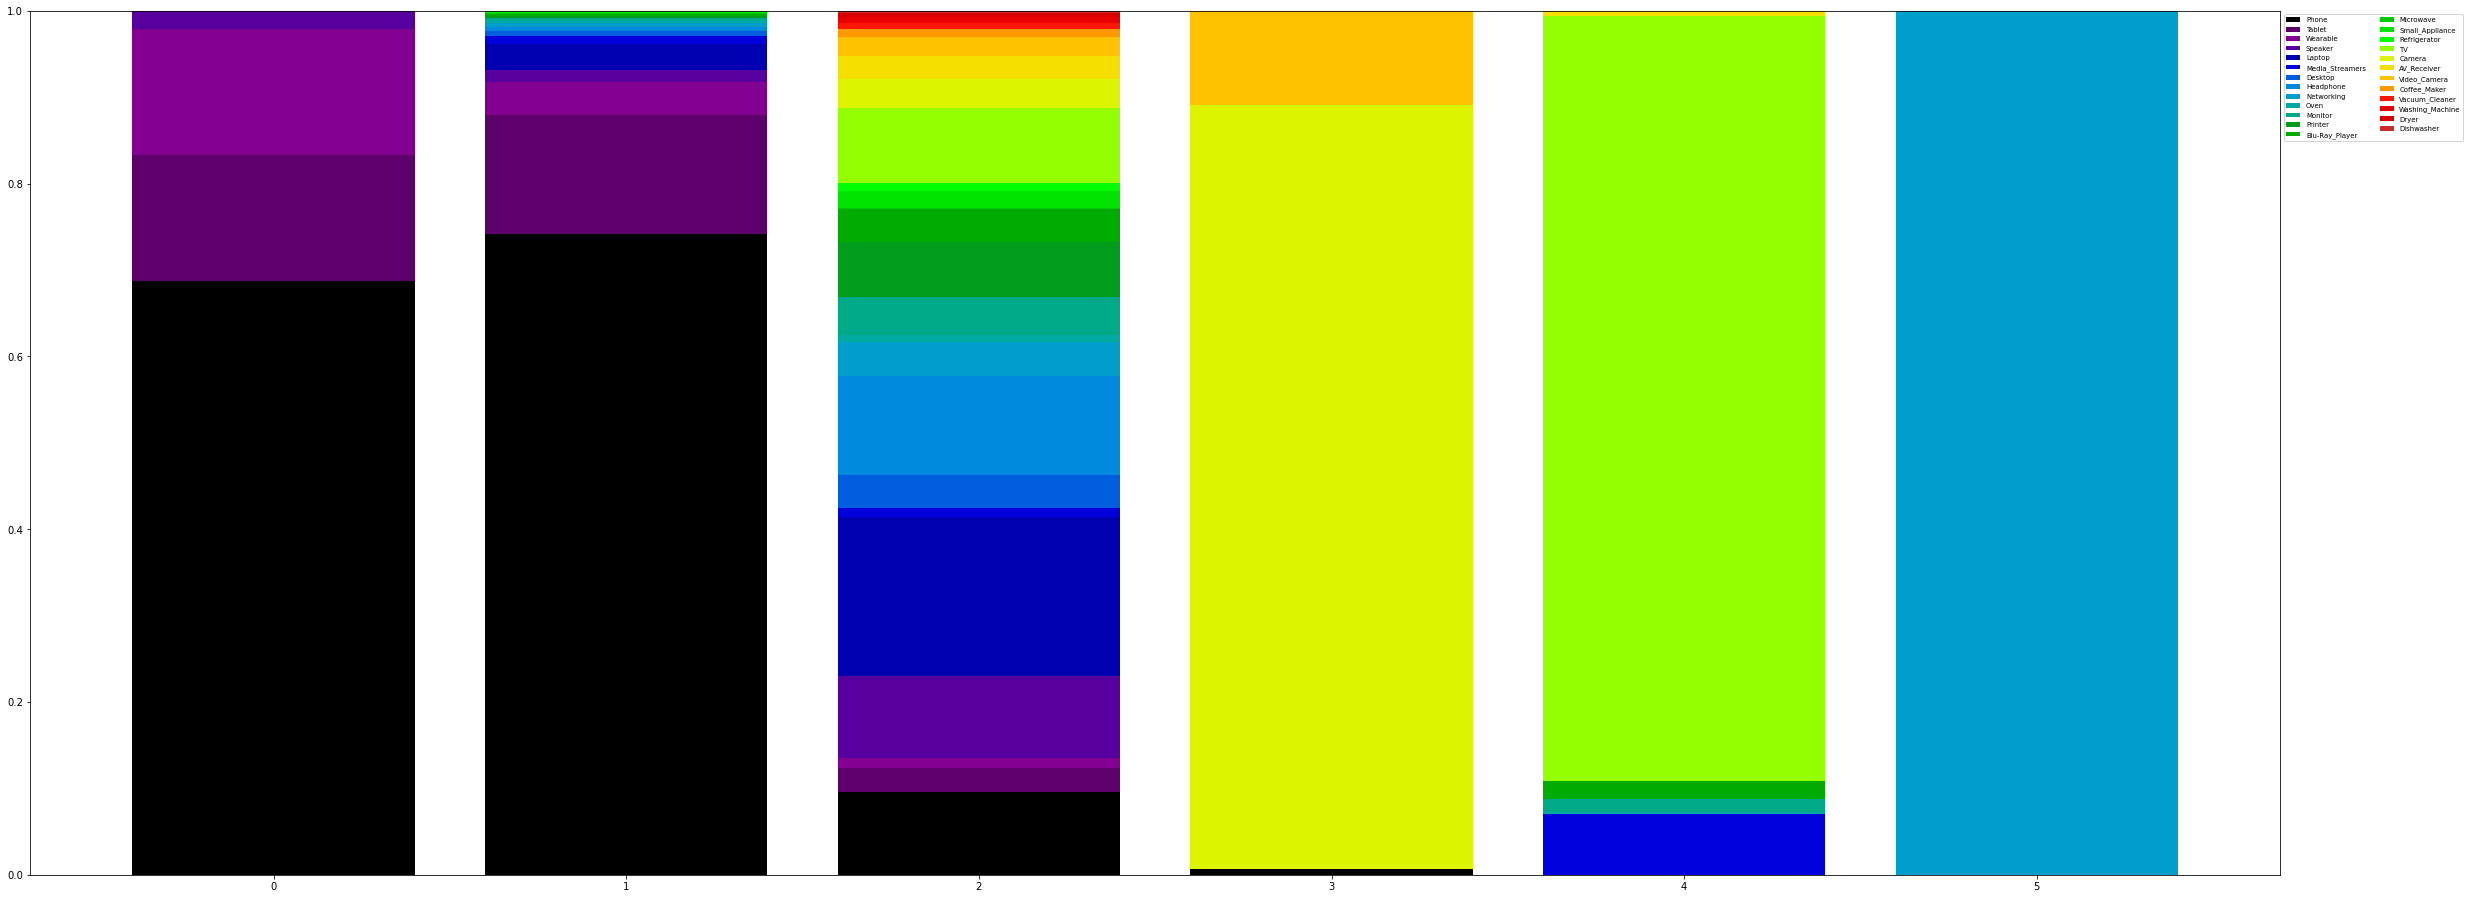

In [20]:
# ------------------------ KMEANS : COUNT VECTOR : COMPOSITION BY COUNT ------------------------ #

# assign each feature set to a cluster
localDF["product_label"] = km.labels_

list_of_series = []
for i in range(num_clusters):
    cluster_series = localDF[localDF["product_label"] == i]["product_type"].value_counts()
    list_of_series.append(cluster_series.rename(str(i)))
countDF = pd.concat(list_of_series, axis = 1)
countDF = countDF.fillna(0)

print()
print("------------------------ KMEANS : COUNT VECTOR : COMPOSITION BY COUNT ------------------------")
print()
print("------ DATAFRAME VISUAL ------")
print(countDF)
print()
print("------ BAR VISUAL ------")
print_bars((countDF/countDF.sum()).T)
print()


------------------------ KMEANS : COUNT VECTOR : COMPOSITION BY PERCENTAGE ------------------------

------ DATAFRAME VISUAL ------
                        0         1         2         3         4        5
Phone            0.027228  0.523102  0.445545  0.004125  0.000000  0.00000
Tablet           0.024823  0.418440  0.556738  0.000000  0.000000  0.00000
Wearable         0.065421  0.308411  0.626168  0.000000  0.000000  0.00000
Speaker          0.001815  0.019964  0.978221  0.000000  0.000000  0.00000
Laptop           0.000000  0.024322  0.975678  0.000000  0.000000  0.00000
Media_Streamers  0.000000  0.087912  0.648352  0.000000  0.263736  0.00000
Desktop          0.000000  0.023148  0.976852  0.000000  0.000000  0.00000
Headphone        0.000000  0.006126  0.993874  0.000000  0.000000  0.00000
Networking       0.000000  0.011268  0.625352  0.000000  0.000000  0.36338
Oven             0.000000  0.056604  0.924528  0.000000  0.018868  0.00000
Monitor          0.000000  0.007752  0.972

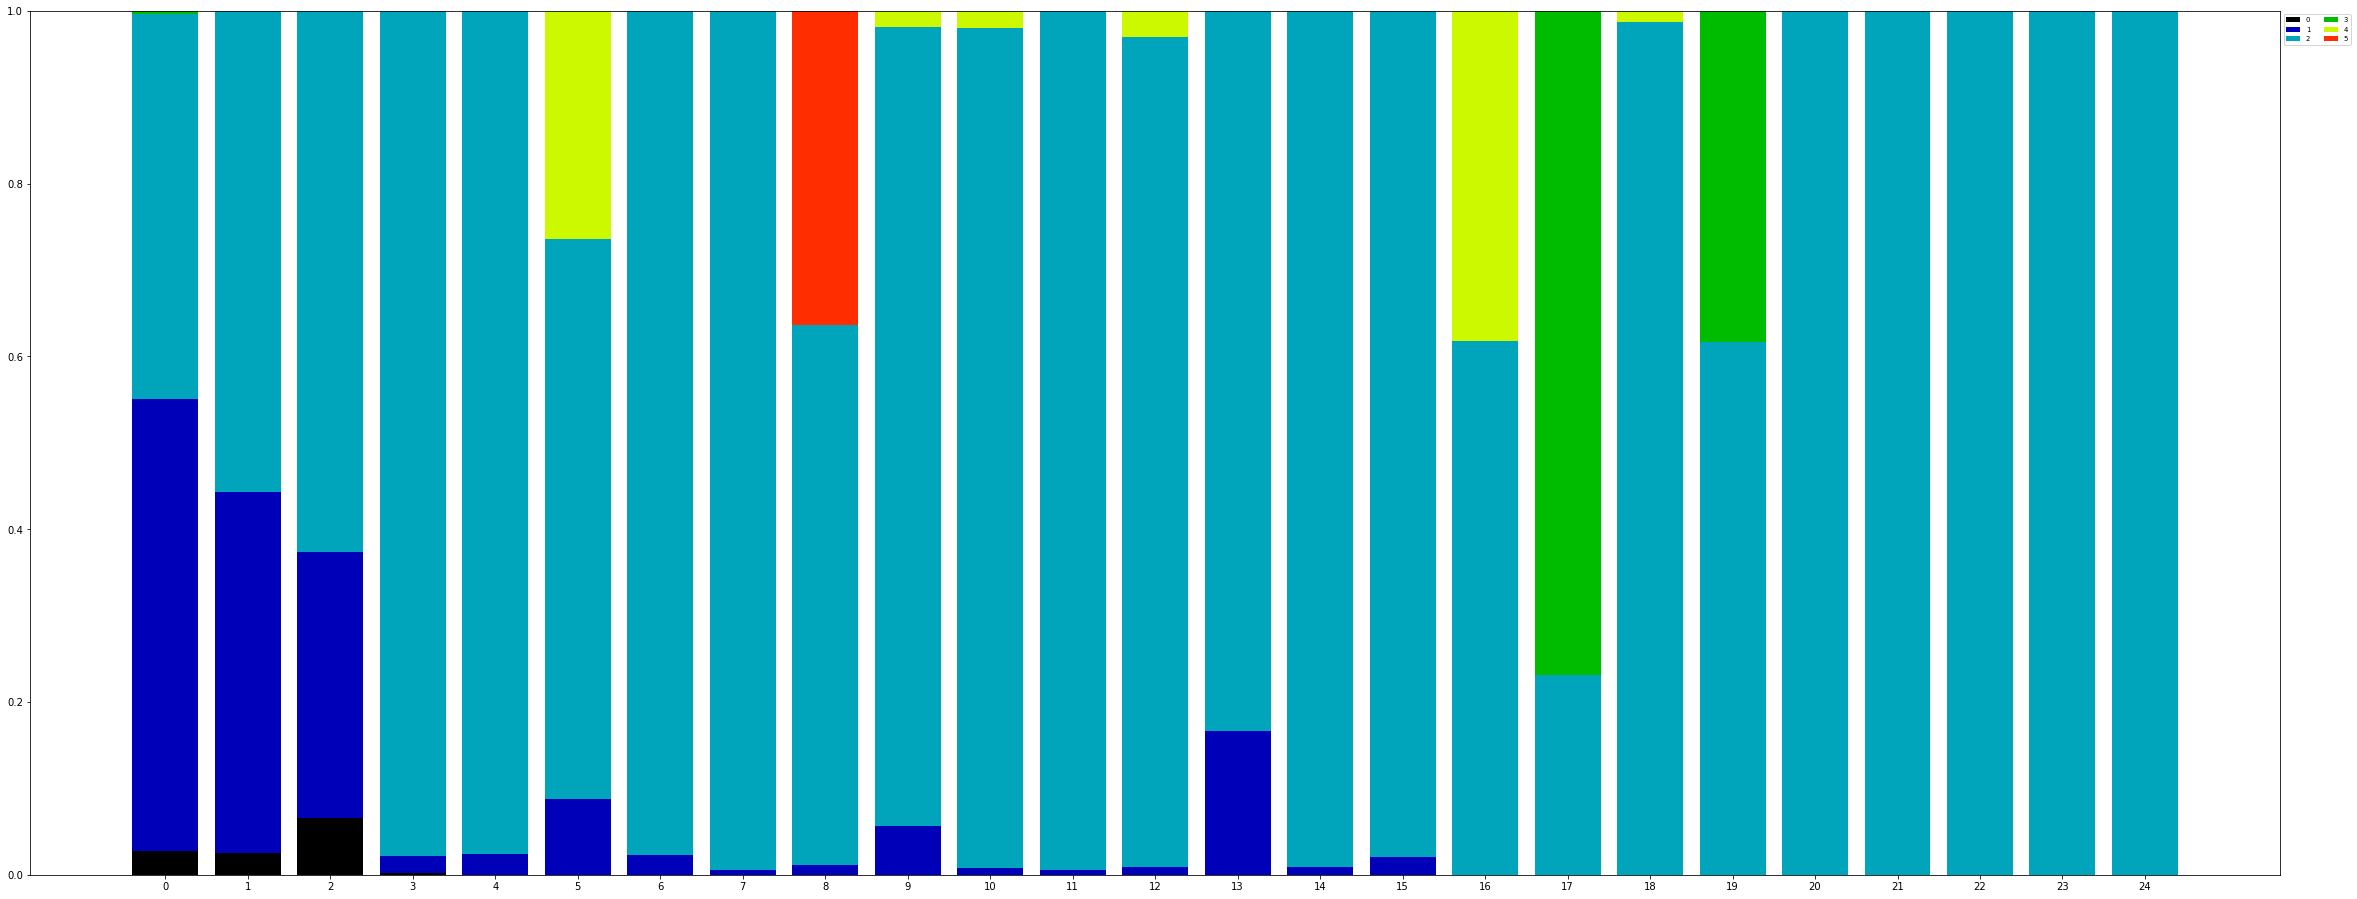

In [21]:
# ------------------------ KMEANS : COUNT VECTOR : COMPOSITION BY PERCENTAGE ------------------------ #

list_of_product_types = list(df["product_type"].unique())

for product_type in list_of_product_types:
    countDF.loc[product_type] = countDF.loc[product_type] / df["product_type"].value_counts()[product_type]

print()
print("------------------------ KMEANS : COUNT VECTOR : COMPOSITION BY PERCENTAGE ------------------------")
print()
print("------ DATAFRAME VISUAL ------")
print(countDF)
print()
print("------ BAR VISUAL ------")
print_bars(countDF)
print()

In [22]:
# ------------------------ KMEANS : TF-IDF VECTOR ------------------------ #

localDF = deepcopy(df)
num_clusters = 6

# perform k means
km = cluster.KMeans(init='k-means++', n_clusters=num_clusters).fit(matrixFreq)



------------------------ KMEANS : TF-IDF VECTOR : COMPOSITION BY COUNT ------------------------

------ DATAFRAME VISUAL ------
                      0      1       2    3      4      5
Laptop           1050.0    0.0     0.0   19    0.0    0.0
Desktop           184.0    0.0     0.0   32    0.0    0.0
Tablet             55.0    0.0    23.0  204    0.0    0.0
Networking          1.0    0.0     8.0  343    0.0    3.0
TV                  0.0  774.0     0.0   20    0.0    0.0
Blu-Ray_Player      0.0   51.0     0.0  178    0.0    0.0
Media_Streamers     0.0   30.0     0.0   61    0.0    0.0
Monitor             0.0   18.0     2.0  238    0.0    0.0
Speaker             0.0    1.0    10.0  540    0.0    0.0
Phone               0.0    0.0  1199.0   12    1.0    0.0
Headphone           0.0    0.0   563.0   90    0.0    0.0
Wearable            0.0    0.0    18.0   89    0.0    0.0
Video_Camera        0.0    0.0     1.0   57  148.0    0.0
Printer             0.0    0.0     1.0    6    0.0  352.0
A

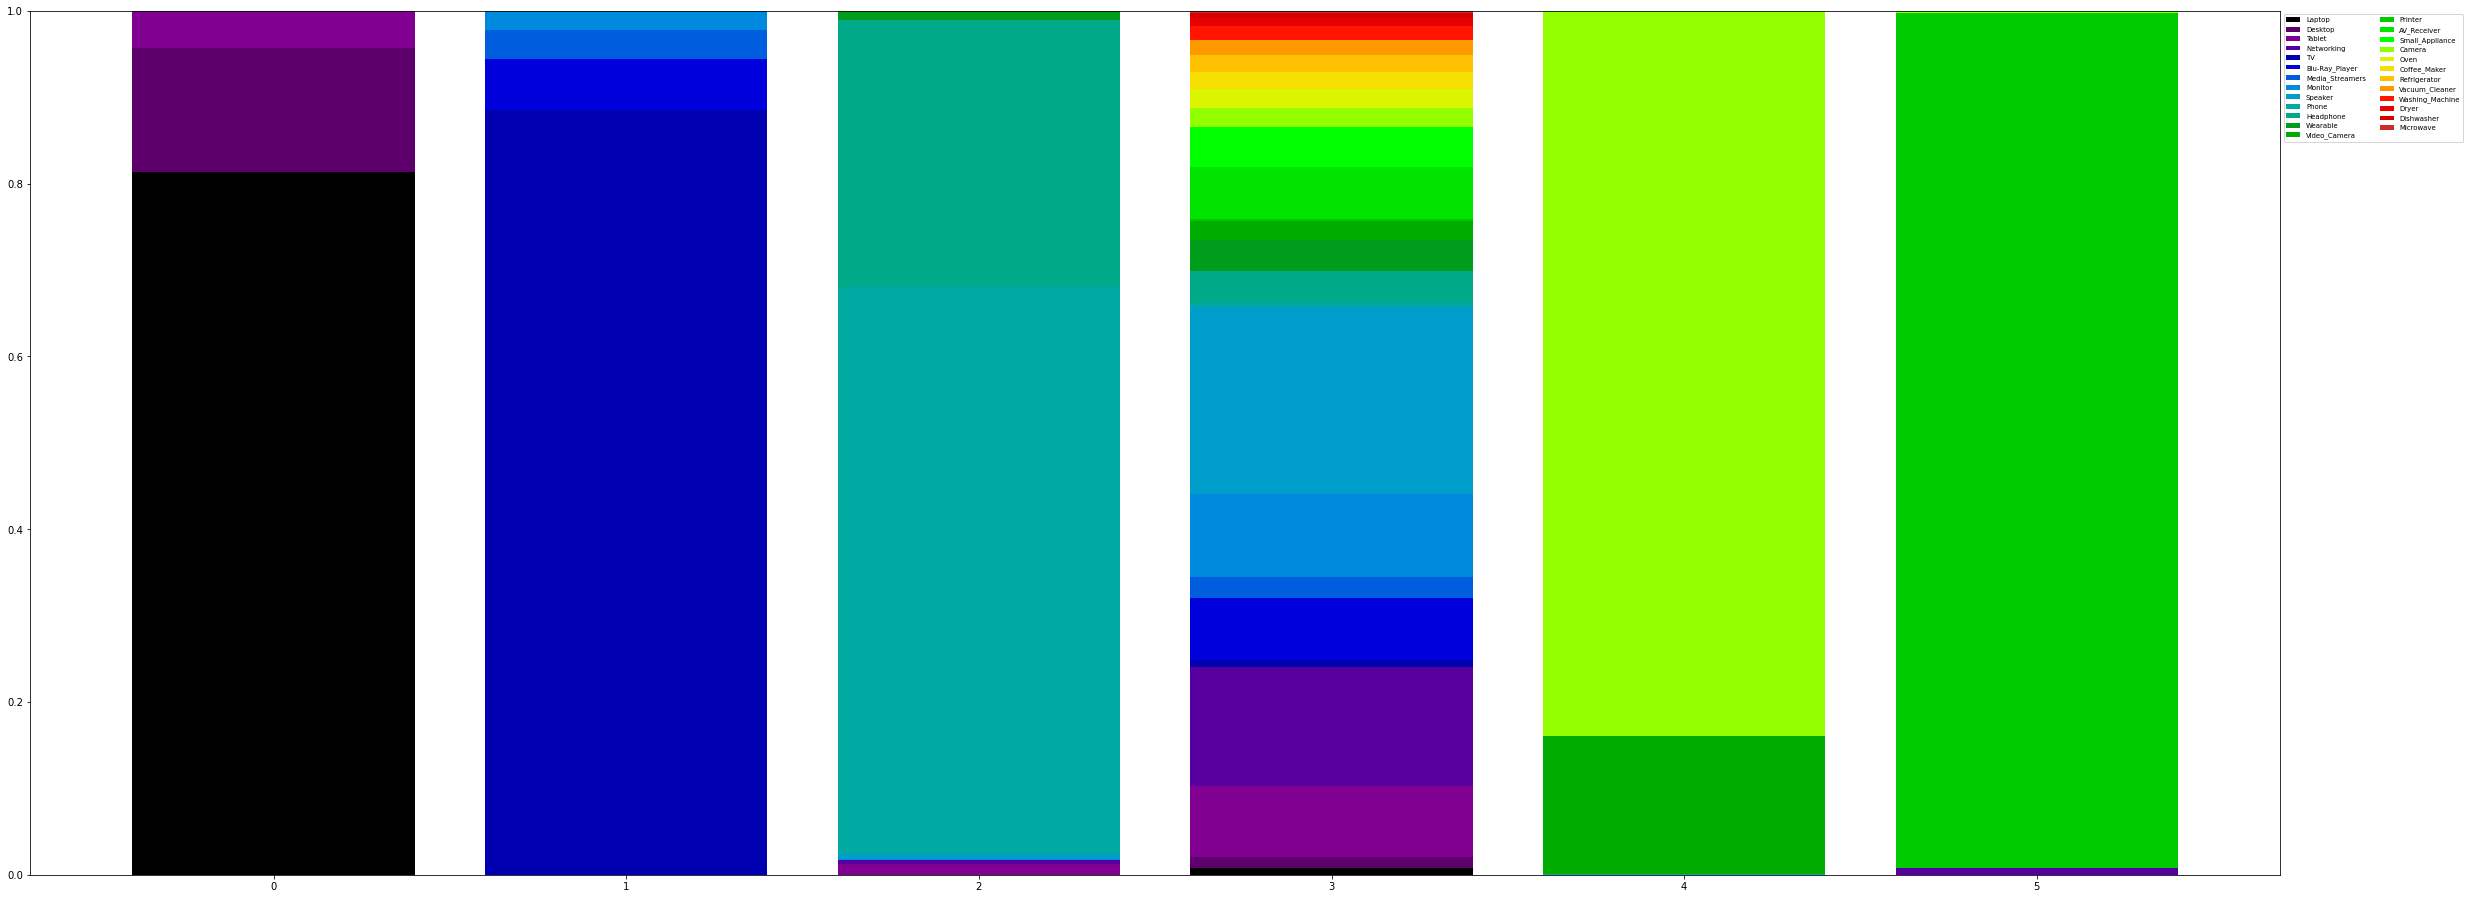

In [23]:
# ------------------------ KMEANS : TF-IDF VECTOR : COMPOSITION BY COUNT ------------------------ #

# assign each feature set to a cluster
localDF["product_label"] = km.labels_

list_of_series = []
for i in range(num_clusters):
    cluster_series = localDF[localDF["product_label"] == i]["product_type"].value_counts()
    list_of_series.append(cluster_series.rename(str(i)))
countDF = pd.concat(list_of_series, axis = 1)
countDF = countDF.fillna(0)

print()
print("------------------------ KMEANS : TF-IDF VECTOR : COMPOSITION BY COUNT ------------------------")
print()
print("------ DATAFRAME VISUAL ------")
print(countDF)
print()
print("------ BAR VISUAL ------")
print_bars((countDF/countDF.sum()).T)
print()


------------------------ KMEANS : TF-IDF Vector : COMPOSITION BY PERCENTAGE ------------------------

------ DATAFRAME VISUAL ------
                        0         1         2         3         4         5
Laptop           0.982226  0.000000  0.000000  0.017774  0.000000  0.000000
Desktop          0.851852  0.000000  0.000000  0.148148  0.000000  0.000000
Tablet           0.195035  0.000000  0.081560  0.723404  0.000000  0.000000
Networking       0.002817  0.000000  0.022535  0.966197  0.000000  0.008451
TV               0.000000  0.974811  0.000000  0.025189  0.000000  0.000000
Blu-Ray_Player   0.000000  0.222707  0.000000  0.777293  0.000000  0.000000
Media_Streamers  0.000000  0.329670  0.000000  0.670330  0.000000  0.000000
Monitor          0.000000  0.069767  0.007752  0.922481  0.000000  0.000000
Speaker          0.000000  0.001815  0.018149  0.980036  0.000000  0.000000
Phone            0.000000  0.000000  0.989274  0.009901  0.000825  0.000000
Headphone        0.000000  0.0

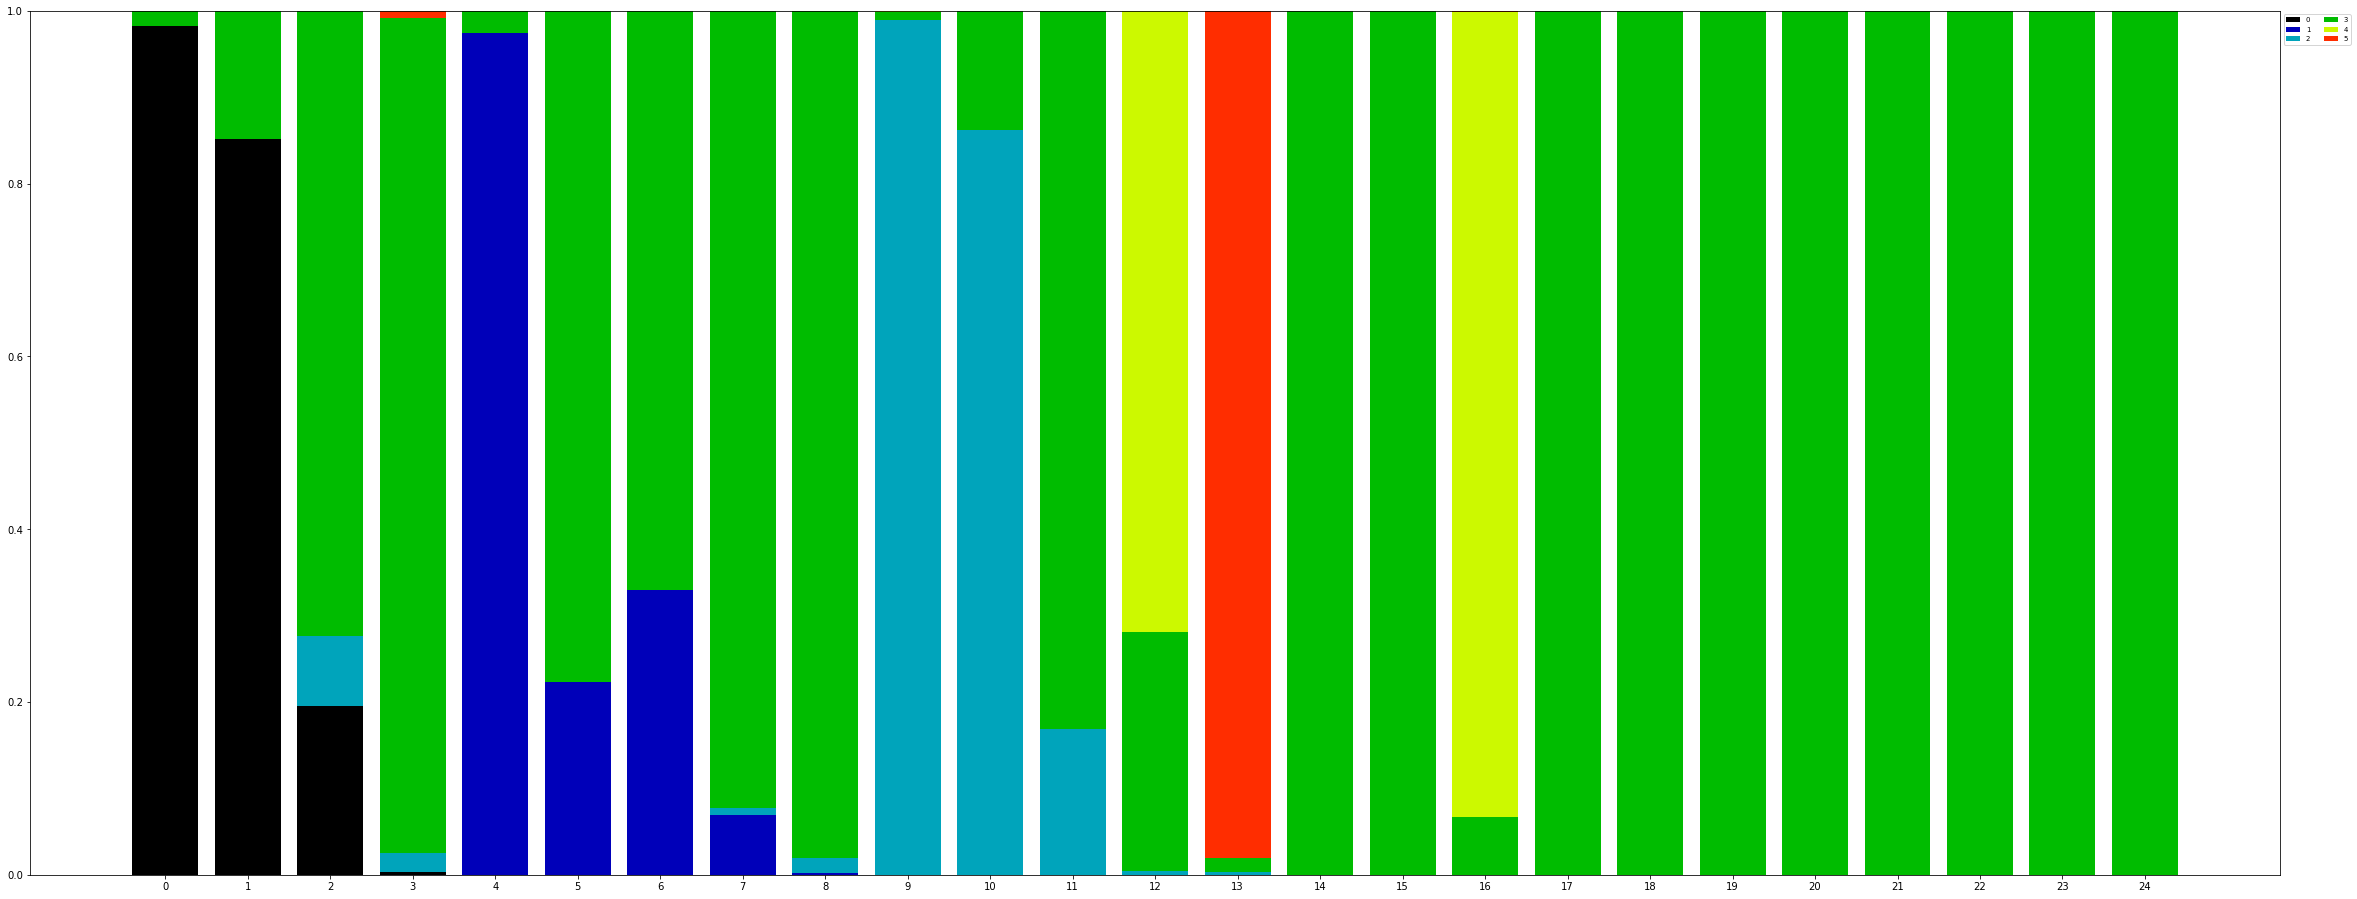

In [24]:
# ------------------------ KMEANS : TF-IDF Vector : COMPOSITION BY PERCENTAGE ------------------------ #

list_of_product_types = list(df["product_type"].unique())

for product_type in list_of_product_types:
    countDF.loc[product_type] = countDF.loc[product_type] / df["product_type"].value_counts()[product_type]

print()
print("------------------------ KMEANS : TF-IDF Vector : COMPOSITION BY PERCENTAGE ------------------------")
print()
print("------ DATAFRAME VISUAL ------")
print(countDF)
print()
print("------ BAR VISUAL ------")
print_bars(countDF)
print()

In [25]:
# ------------------------ BIRCH CLUSTERING : COUNT VECTOR ------------------------ #

localDF = deepcopy(df)
num_clusters = 6

# perform k means
km = cluster.Birch(n_clusters=num_clusters).fit(matrixCount)


------------------------ BIRCH CLUSTERING : COUNT VECTOR : COMPOSITION BY COUNT ------------------------

------ DATAFRAME VISUAL ------
                    0      1      2      3      4      5
Laptop           1068    0.0    0.0    0.0    1.0    0.0
Headphone         653    0.0    0.0    0.0    0.0    0.0
Phone             576    0.0  633.0    2.0    1.0    0.0
Speaker           546    0.0    0.0    0.0    5.0    0.0
Printer           359    0.0    0.0    0.0    0.0    0.0
Tablet            269    0.0   11.0    1.0    1.0    0.0
Networking        249    0.0    3.0    0.0    0.0  103.0
Desktop           212    0.0    0.0    1.0    3.0    0.0
Monitor           159    0.0    0.0    2.0   97.0    0.0
Small_Appliance   114    0.0    0.0    0.0    0.0    0.0
AV_Receiver       111    0.0    0.0    0.0   38.0    0.0
Camera             76    0.0    0.0  758.0    0.0    0.0
Wearable           65    0.0   34.0    3.0    5.0    0.0
Oven               53    0.0    0.0    0.0    0.0    0.0
Coffee_

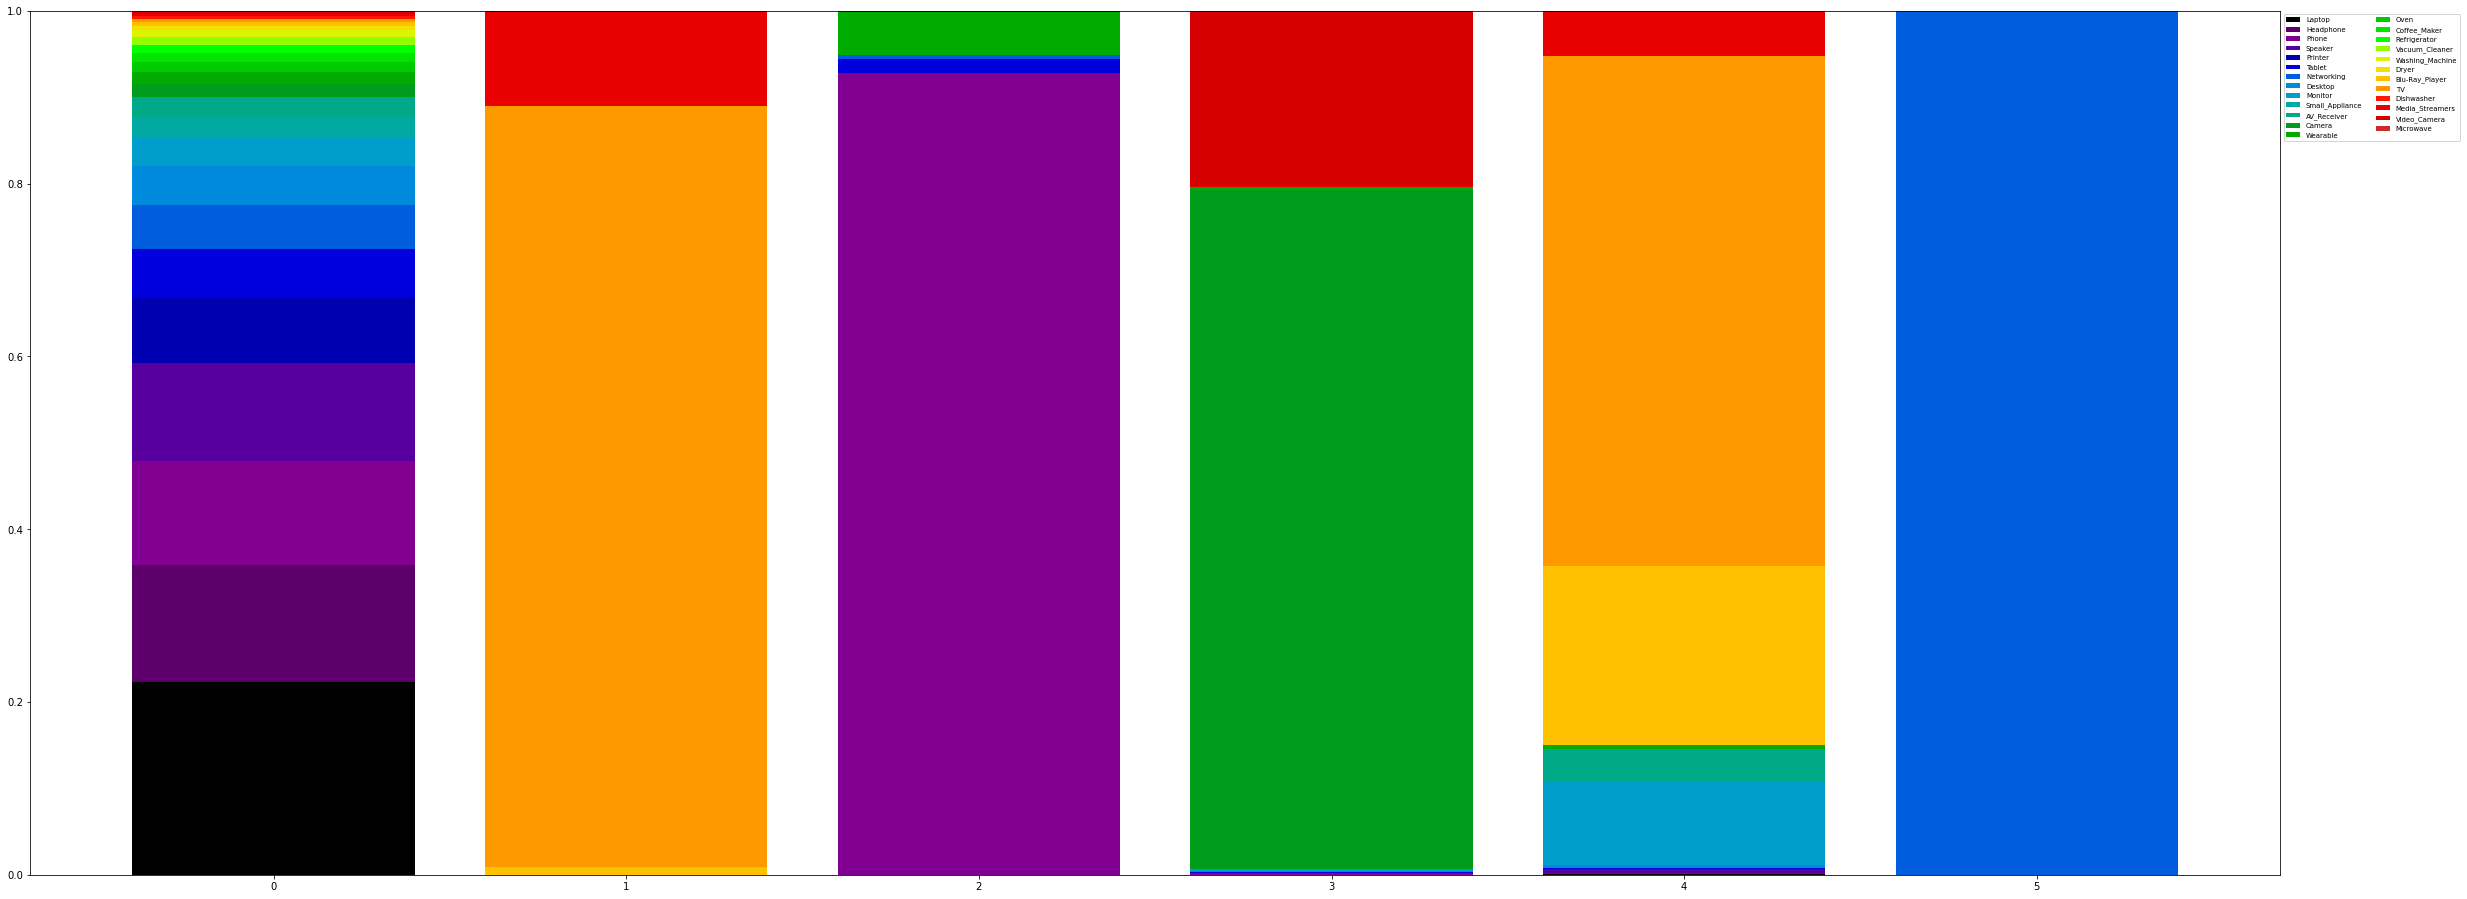

In [26]:
# ------------------------ BIRCH CLUSTERING : COUNT VECTOR : COMPOSITION BY COUNT ------------------------ #

# assign each feature set to a cluster
localDF["product_label"] = km.labels_

list_of_series = []
for i in range(num_clusters):
    cluster_series = localDF[localDF["product_label"] == i]["product_type"].value_counts()
    list_of_series.append(cluster_series.rename(str(i)))
countDF = pd.concat(list_of_series, axis = 1)
countDF = countDF.fillna(0)

print()
print("------------------------ BIRCH CLUSTERING : COUNT VECTOR : COMPOSITION BY COUNT ------------------------")
print()
print("------ DATAFRAME VISUAL ------")
print(countDF)
print()
print("------ BAR VISUAL ------")
print_bars((countDF/countDF.sum()).T)
print()


------------------------ BIRCH CLUSTERING : COUNT VECTOR : COMPOSITION BY PERCENTAGE ------------------------

------ DATAFRAME VISUAL ------
                        0         1         2         3         4         5
Laptop           0.999065  0.000000  0.000000  0.000000  0.000935  0.000000
Headphone        1.000000  0.000000  0.000000  0.000000  0.000000  0.000000
Phone            0.475248  0.000000  0.522277  0.001650  0.000825  0.000000
Speaker          0.990926  0.000000  0.000000  0.000000  0.009074  0.000000
Printer          1.000000  0.000000  0.000000  0.000000  0.000000  0.000000
Tablet           0.953901  0.000000  0.039007  0.003546  0.003546  0.000000
Networking       0.701408  0.000000  0.008451  0.000000  0.000000  0.290141
Desktop          0.981481  0.000000  0.000000  0.004630  0.013889  0.000000
Monitor          0.616279  0.000000  0.000000  0.007752  0.375969  0.000000
Small_Appliance  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000
AV_Receiver      0.74

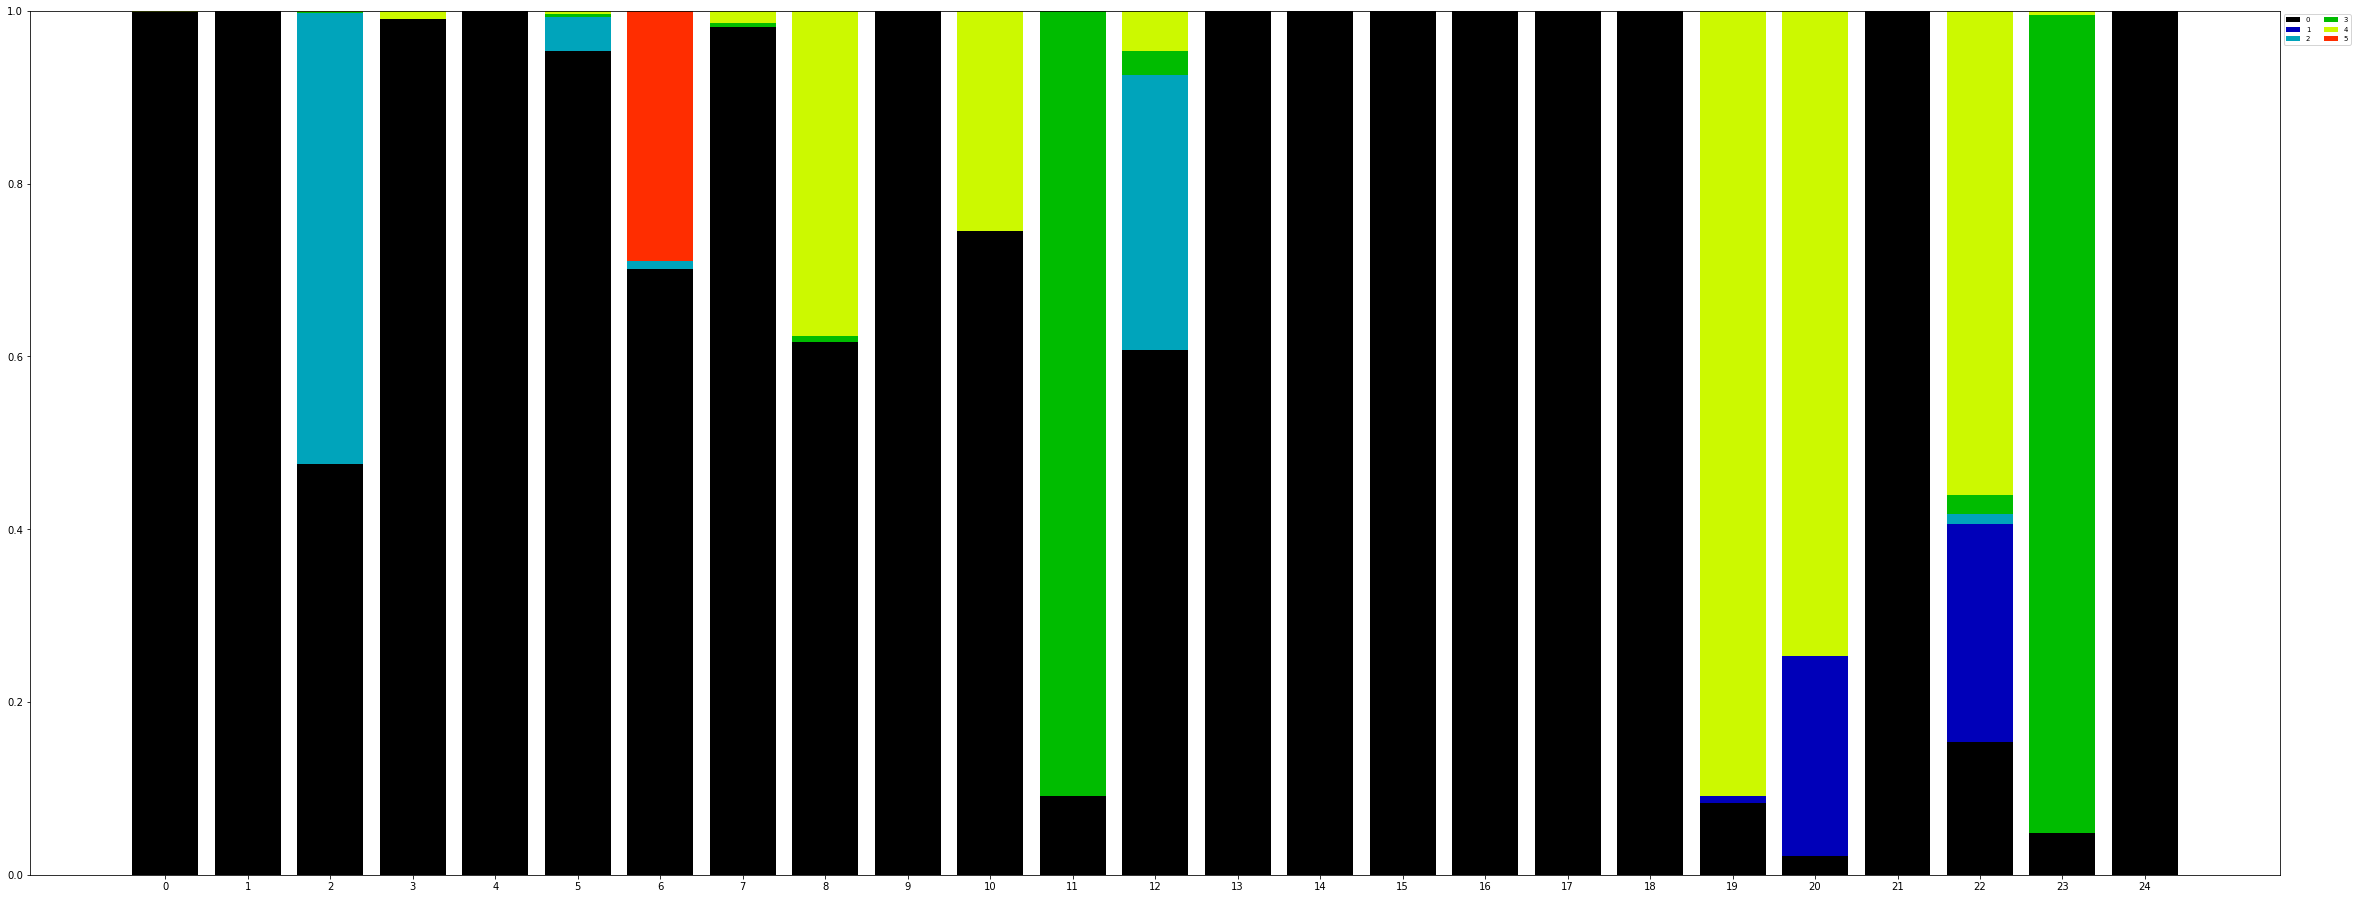

In [27]:
# ------------------------ BIRCH CLUSTERING : COUNT VECTOR : COMPOSITION BY PERCENTAGE ------------------------ #

list_of_product_types = list(df["product_type"].unique())

for product_type in list_of_product_types:
    countDF.loc[product_type] = countDF.loc[product_type] / df["product_type"].value_counts()[product_type]

print()
print("------------------------ BIRCH CLUSTERING : COUNT VECTOR : COMPOSITION BY PERCENTAGE ------------------------")
print()
print("------ DATAFRAME VISUAL ------")
print(countDF)
print()
print("------ BAR VISUAL ------")
print_bars(countDF)
print()

In [28]:
# ------------------------ BIRCH CLUSTERING : IF-IDF VECTOR ------------------------ #

localDF = deepcopy(df)
num_clusters = 6

# perform k means
km = cluster.Birch(n_clusters=num_clusters).fit(matrixFreq)


------------------------ BIRCH CLUSTERING : IF-IDF VECTOR : COMPOSITION BY COUNT ------------------------

------ DATAFRAME VISUAL ------
                   0      1       2      3      4      5
Headphone        651    1.0     1.0    0.0    0.0    0.0
Speaker          544    1.0     4.0    1.0    0.0    1.0
Networking       313    1.0    40.0    0.0    1.0    0.0
Monitor          240    5.0     1.0    0.0    0.0   12.0
Blu-Ray_Player   221    0.0     4.0    0.0    0.0    4.0
Tablet           198   14.0    69.0    1.0    0.0    0.0
AV_Receiver      149    0.0     0.0    0.0    0.0    0.0
Small_Appliance  114    0.0     0.0    0.0    0.0    0.0
Wearable         105    0.0     2.0    0.0    0.0    0.0
Desktop          101  113.0     1.0    1.0    0.0    0.0
Media_Streamers   86    2.0     1.0    0.0    0.0    2.0
Phone             58    3.0  1121.0   30.0    0.0    0.0
TV                55    2.0     3.0   14.0    0.0  720.0
Laptop            54  997.0    13.0    5.0    0.0    0.0
Oven  

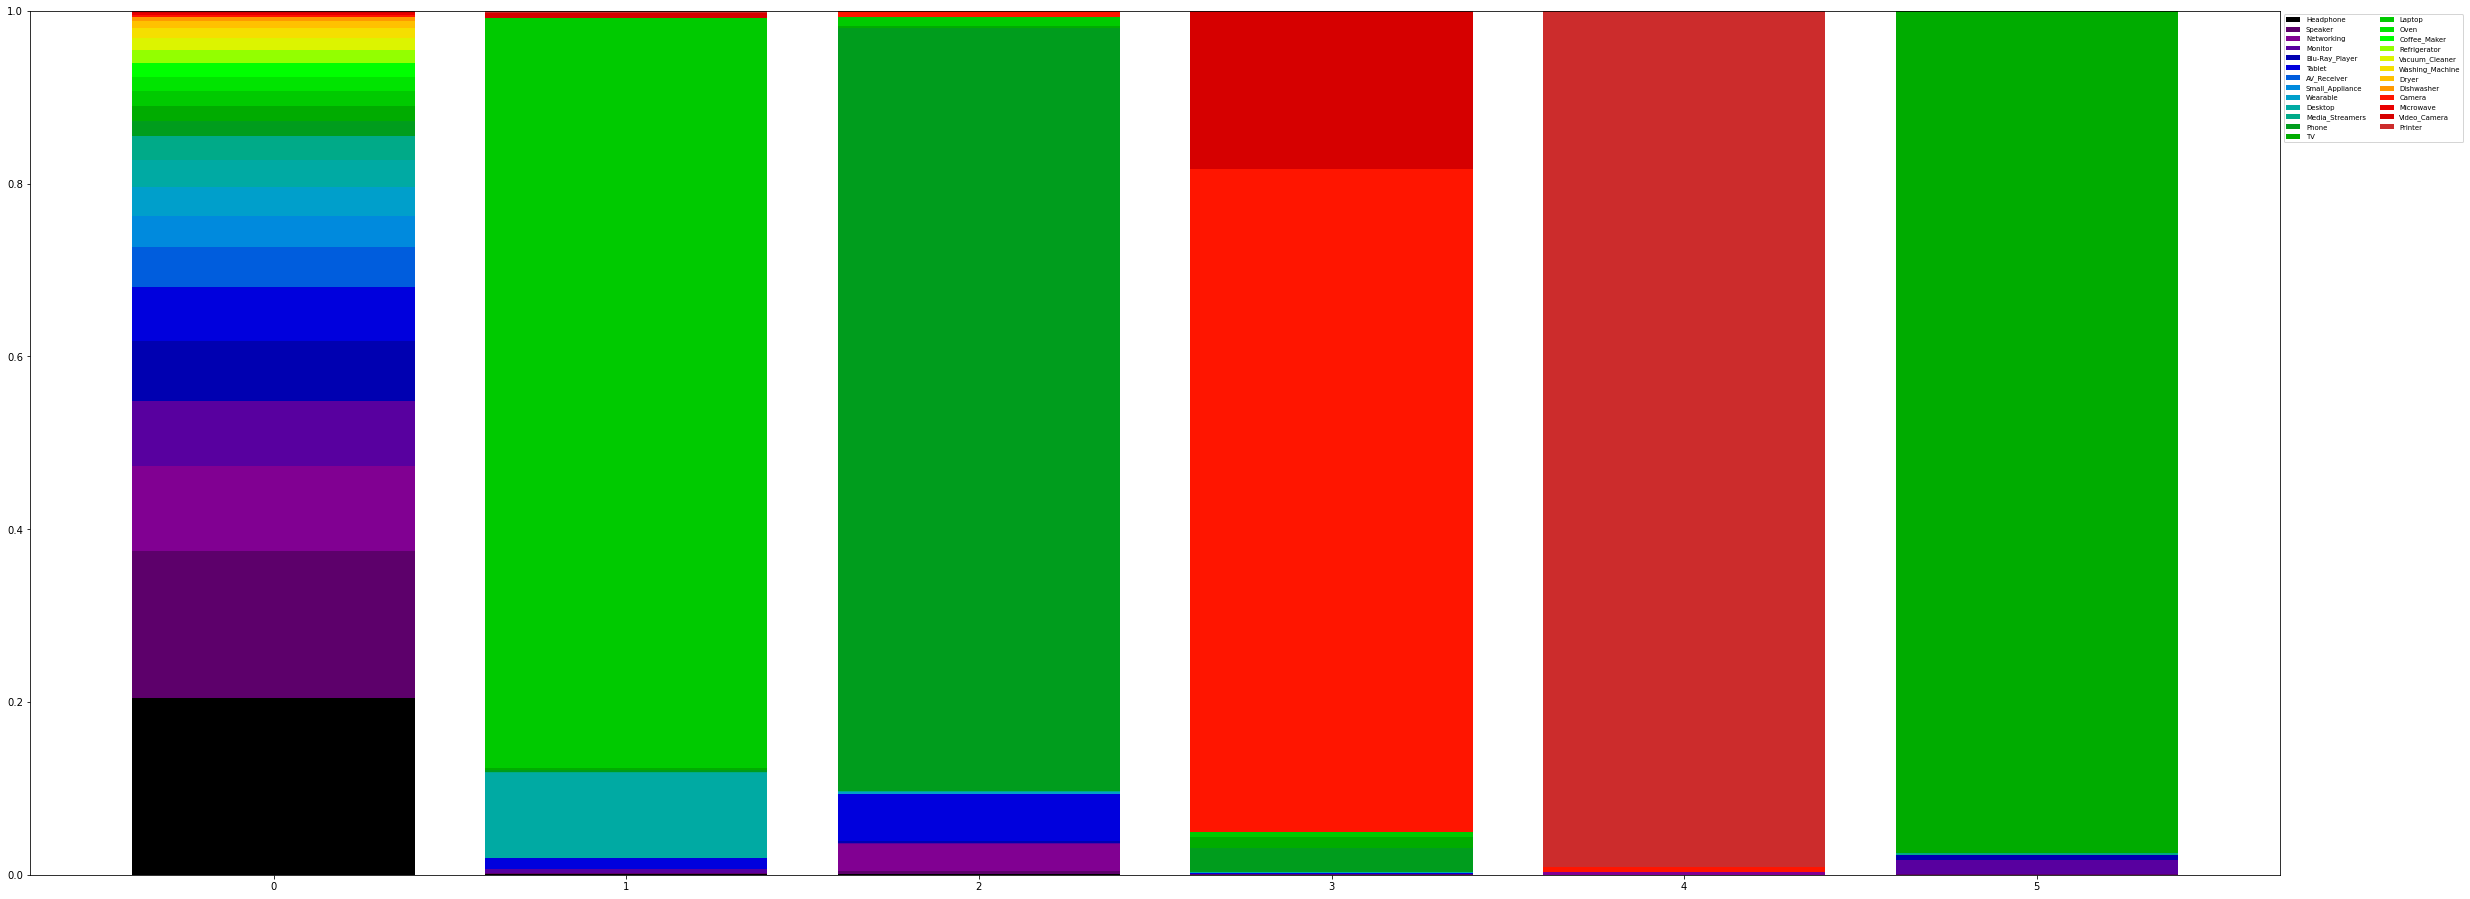

In [29]:
# ------------------------ BIRCH CLUSTERING : IF-IDF VECTOR : COMPOSITION BY COUNT ------------------------ #

# assign each feature set to a cluster
localDF["product_label"] = km.labels_

list_of_series = []
for i in range(num_clusters):
    cluster_series = localDF[localDF["product_label"] == i]["product_type"].value_counts()
    list_of_series.append(cluster_series.rename(str(i)))
countDF = pd.concat(list_of_series, axis = 1)
countDF = countDF.fillna(0)

print()
print("------------------------ BIRCH CLUSTERING : IF-IDF VECTOR : COMPOSITION BY COUNT ------------------------")
print()
print("------ DATAFRAME VISUAL ------")
print(countDF)
print()
print("------ BAR VISUAL ------")
print_bars((countDF/countDF.sum()).T)
print()


------------------------ BIRCH CLUSTERING : IF-IDF VECTOR : COMPOSITION BY PERCENTAGE ------------------------

------ DATAFRAME VISUAL ------
                        0         1         2         3         4         5
Headphone        0.996937  0.001531  0.001531  0.000000  0.000000  0.000000
Speaker          0.987296  0.001815  0.007260  0.001815  0.000000  0.001815
Networking       0.881690  0.002817  0.112676  0.000000  0.002817  0.000000
Monitor          0.930233  0.019380  0.003876  0.000000  0.000000  0.046512
Blu-Ray_Player   0.965066  0.000000  0.017467  0.000000  0.000000  0.017467
Tablet           0.702128  0.049645  0.244681  0.003546  0.000000  0.000000
AV_Receiver      1.000000  0.000000  0.000000  0.000000  0.000000  0.000000
Small_Appliance  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000
Wearable         0.981308  0.000000  0.018692  0.000000  0.000000  0.000000
Desktop          0.467593  0.523148  0.004630  0.004630  0.000000  0.000000
Media_Streamers  0.9

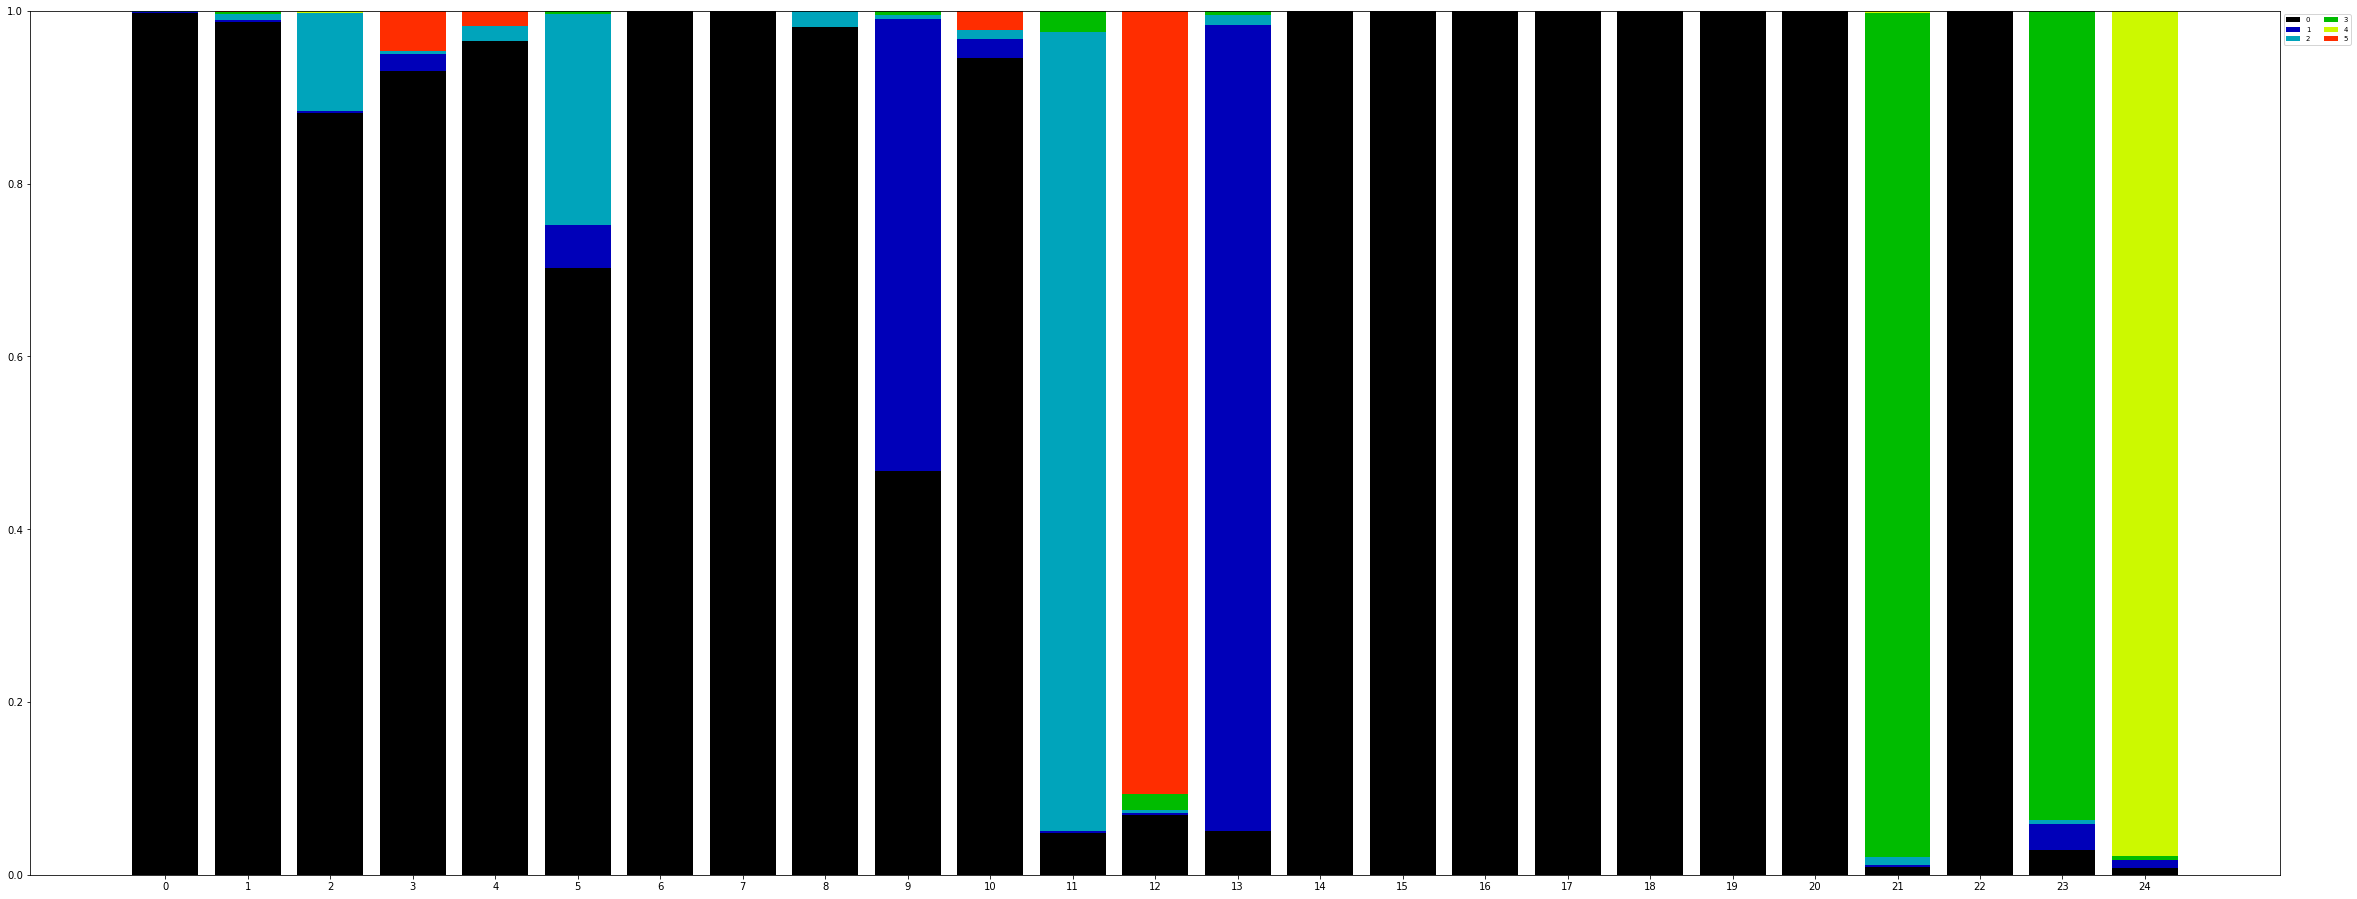

In [30]:
# ------------------------ BIRCH : IF-IDF VECTOR : COMPOSITION BY PERCENTAGE ------------------------ #

list_of_product_types = list(df["product_type"].unique())

for product_type in list_of_product_types:
    countDF.loc[product_type] = countDF.loc[product_type] / df["product_type"].value_counts()[product_type]

print()
print("------------------------ BIRCH CLUSTERING : IF-IDF VECTOR : COMPOSITION BY PERCENTAGE ------------------------")
print()
print("------ DATAFRAME VISUAL ------")
print(countDF)
print()
print("------ BAR VISUAL ------")
print_bars(countDF)
print()

You may use the following table or use plots to illustrate your experiment results:  

|  Model  | Vector | Cluster Composition by Count | Cluster Composition by Percentage |
|:-------:|:------:|:----------------------------:|:---------------------------------:|
| k-means |  count |            `TODO`            |               `TODO`              |
| k-means | tf-idf |            `TODO`            |               `TODO`              |
|  `TODO` |  count |            `TODO`            |               `TODO`              |
|  `TODO` | tf-idf |            `TODO`            |               `TODO`              |

Analyze your experiment results and add a brief discussion here on:
- which setting yields better clusters (supergroups)?
- what're your justifications for your answer of the above question?
- any other observations?

I would say that my last experiment using the <b>birch model and TF-IDF vector were the best<b>.
    
My first major indicator is by looking at the <b>cluster coposition by percentage<b>. Looking at the bar graph I created, in an ideal situation you want each bar to be filled with only 1-2 colors (the specific product type only assigned to 1 to 2 clusters) and not have any 1 cluster dominate each product type. 
    
Unfortunately, throughout all my experiments 1 cluster did tend to dominate. That is why you see a lot of black in the bar graphs. 3 Explanations are:
    
    (1) my vectorization of the reviews could be cleaner (ngrams, more features, etc) 
    (2) the amount of clusters i'm making could be adjusted
    (3) some product could be clustered together simply as appliances (coffee machine, fridge, etc) and that's why  
        one cluster in almost every experiment is a hodge podge of everything
    
According to this logic, my birch model using TF-IDF has the best cluster spread when looking at cluster composition by percentage. You can see around 6-8 product types are assigned to indiviual clusters with the rest of the appliances clustered together. Visually, this is better seen on the cluster composition by count
    
The clusters in cluster composition by count are *roughly* split up into either appliances, laptop/desktops, phones, camera/video camera, printer, or tv. Wich all make sense.